# Тестирование Louvain алгоритма


Для тестирования алгоритма будем использовать библиотеку для работы с графами **NetworkX** и пакет **python-louvain**,
в котором реализован louvain алгоритм.

Библиотека **NetworkX** присутствует в пакетном менеджере **pip**, поэтому для установки достаточно набрать `pip install networkx`.

Для **python-louvain** аналогично: `pip install python-louvain`, но импортируется данный пакет под названием **community**


In [1]:
import community
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Попробуем использовать данный алгоритм на стандартном датасете: **Zachary karate club**

In [2]:
G = nx.karate_club_graph()

In [3]:
partition = community.best_partition(G)

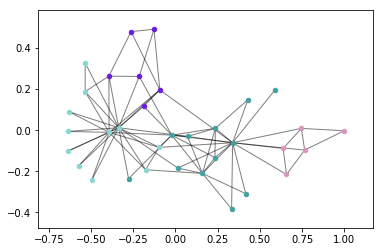

0.4188034188034188


In [4]:
import numpy as np

size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.

for com in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    colors = [np.random.rand(3)]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, 
                           node_color = colors)

nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()
modularity = community.modularity(partition, G)
print(modularity)

Часто используемый граф для тестирования алгоритмов нахождения сообществ - planted partition граф

In [2]:
l = 4
k = 32
Pin = 0.35
Pout = 0.01


In [6]:
E = nx.planted_partition_graph(l, k, Pin, Pout)

In [7]:
pl_partition = community.best_partition(E)

In [3]:
n = l * k
list_ = [ i // k for i in range(0,  n)]

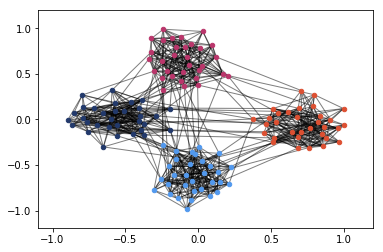

0.6619636276237781


In [9]:
size = float(len(set(pl_partition.values())))
pos1 = nx.spring_layout(E)
count = 0.
for com in set(pl_partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in pl_partition.keys()
                                if pl_partition[nodes] == com]
    nx.draw_networkx_nodes(E, pos1, list_nodes, node_size = 20,
                                node_color = [np.random.rand(3)])


nx.draw_networkx_edges(E, pos1, alpha=0.5)
plt.show()
modularity = community.modularity(pl_partition, E)
print(modularity)

In [10]:
cmp = []
for i in range(0,  n):
    if list_[i] == pl_partition[i]:
        cmp.append(1)
    else:
        cmp.append(0)
percent_of_right_nodes = sum(cmp) / n
print(percent_of_right_nodes)

1.0


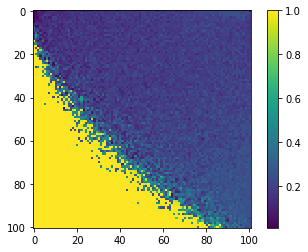

In [11]:
Pin_list = [i/100 for i in range(0,101)]
Pout_list = [i/100 for i in range(0,101)]
percent = []
for Pin in Pin_list:
    percent.append([])
    for Pout in Pout_list:
        E = nx.planted_partition_graph(l, k, Pin, Pout)
        pl_partition = community.best_partition(E)
        cmp = []
        for i in range(0,  n):
            if list_[i] == pl_partition[i]:
                cmp.append(1)
            else:
                cmp.append(0)
        percent_of_right_nodes = sum(cmp) / n
        percent[-1].append(percent_of_right_nodes)
plt.imshow(percent)
plt.colorbar()
plt.show()

Используем алгоритм на примере, приведенном в статье: граф, состоящий из тридцати клик, в каждой из которых пять вершин.
Если клики расположить по кругу, то каждую клику нужно соединить с соседними одним ребром

In [11]:
l = 30
k = 5
Pin = 1
Pout = 0.0

In [12]:
E = nx.planted_partition_graph(l, k, Pin, Pout)

In [13]:
for i in range(4, 148, 5):
    E.add_edge(i, i + 1)
E.add_edge(149, 0)

In [14]:
pl_partition = community.best_partition(E)

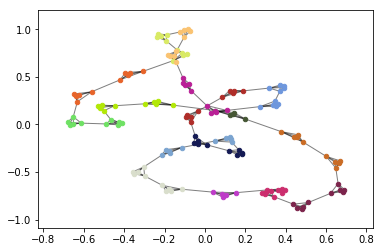

0.8870707070707073


In [15]:
size = float(len(set(pl_partition.values())))
pos1 = nx.spring_layout(E)
count = 0.
for com in set(pl_partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in pl_partition.keys()
                                if pl_partition[nodes] == com]
    nx.draw_networkx_nodes(E, pos1, list_nodes, node_size = 20,
                                node_color = [np.random.rand(3)])


nx.draw_networkx_edges(E, pos1, alpha=0.5)
plt.show()
mod = community.modularity(pl_partition, E)
print(mod)

Результат может изменяться в зависимости от того, в каком порядке расположены вершины.
В предыдущем примере изменим порядок расположения вершин и посмотрим на результат.

In [16]:
import numpy as np
rand = np.random.permutation(l * k)
R = nx.Graph()
for ed in E.edges:
    if (rand[ed[0]], rand[ed[1]]) not in R.edges:
        R.add_edge(rand[ed[0]], rand[ed[1]])

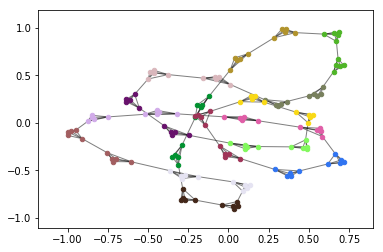

0.8878787878787882


In [17]:
pl_partition = community.best_partition(R)
pos1 = nx.spring_layout(R)
count = 0.
for com in set(pl_partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in pl_partition.keys()
                                if pl_partition[nodes] == com]
    nx.draw_networkx_nodes(R, pos1, list_nodes, node_size = 20,
                                node_color = [np.random.rand(3)])


nx.draw_networkx_edges(R, pos1, alpha=0.5)
plt.show()
mod = community.modularity(pl_partition, R)
print(mod)

Итоговый результат оказался аналогичен результату, полученному в случае, когда вершины были упорядочены

Стоит попробовать алгоритм на больших графах, для исследования которых он и предназначен.
Я решил взять датасет, на котором производилось тестирование в статье. Это абоненты бельгийской телефонной сети, в ней 2.6 млн вершин и 6.3 млн ребер. К сожалению, данного датасета в открытом доступе я не нашел, поэтому решил выбрать датасет похожего размера.
Так я выбрал [данный датасет.](http://snap.stanford.edu/data/com-Youtube.html) В нем 1,134,890 вершин и 2,987,624 ребра.

In [18]:
import numpy as np
Data = np.loadtxt('/home/maxim/Downloads/com-youtube.ungraph.txt', dtype = int, skiprows = 4)
N, dp1 = Data.shape

In [19]:
print(N, dp1)

2987624 2


In [20]:
print(Data[:30])

[[     1      2]
 [     1      3]
 [     1      4]
 [     1      5]
 [     1      6]
 [     1      7]
 [     1      8]
 [     1      9]
 [     1     10]
 [     1     11]
 [     1     12]
 [     1     13]
 [     1     14]
 [     1     15]
 [     1     16]
 [     1     17]
 [     1     18]
 [     1     19]
 [     1     20]
 [     1     21]
 [     1     22]
 [     1    376]
 [     1   1219]
 [     1 268635]
 [     1 317880]
 [     1 665255]
 [     1 665256]
 [     1 665257]
 [     1 665258]
 [     2      4]]


In [21]:
G = nx.Graph()
for row in Data:
    G.add_edge(*tuple(row))


In [24]:
print(len(G.nodes()))

1134890


In [25]:
import time

start = time.time()

partition = community.best_partition(G)
end = time.time()

print(end - start)

163.85812425613403


In [26]:
modularity = community.modularity(partition, G)
print(modularity)


0.7104791642634416


In [27]:
Data = np.loadtxt('/home/maxim/Downloads/com-amazon.ungraph.txt', dtype = int, skiprows = 1)
N, dp1 = Data.shape

In [28]:
print(N, dp1)

925872 2


In [29]:
G = nx.Graph()
for row in Data:
    G.add_edge(*tuple(row))
print(len(G.nodes()))

334863


In [30]:
import time

start = time.time()

partition = community.best_partition(G)
end = time.time()
print(end - start)

77.69811868667603


In [31]:
modularity = community.modularity(partition, G)
print(modularity)

0.9262857560012273


In [13]:
Data = np.loadtxt('/home/maxim/Downloads/com-lj.ungraph.txt', dtype = int, skiprows = 4)
N, dp1 = Data.shape

In [ ]:
print(N, dp1)
G = nx.Graph()
for row in Data:
    G.add_edge(*tuple(row))


34681189 2


In [ ]:
print(N, dp1)

In [ ]:
import time

start = time.time()

partition = community.best_partition(G)
end = time.time()
print(end - start)

In [ ]:
modularity = community.modularity(partition, G)
print(modularity)

In [32]:
%matplotlib inline

Data = np.loadtxt('/home/maxim/Downloads/facebook_combined.txt', dtype = int)
N, dp1 = Data.shape

In [33]:
print(N, dp1)
G = nx.Graph()
for row in Data:
    G.add_edge(*tuple(row))
print(len(G.nodes()))

88234 2
4039


In [34]:
import time

start = time.time()

partition = community.best_partition(G)
end = time.time()
print(end - start)

1.8079249858856201


In [35]:
modularity = community.modularity(partition, G)
print(modularity)

0.8349747580304009


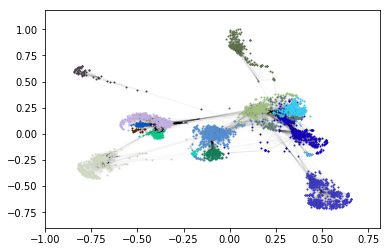

In [36]:
import time
start = time.time()
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.

for com in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    colors = [np.random.rand(3)]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 1, 
                           node_color = colors)

nx.draw_networkx_edges(G,pos, alpha=0.01)
plt.show()
end = time.time()

In [37]:
print(size)
print(end - start)

16.0
41.50642681121826
